<a href="https://colab.research.google.com/github/dcolbourne/Colab/blob/TensorFlow/02_NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# Introduction to nueral network classification with Tensorflow



## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 exammples
n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


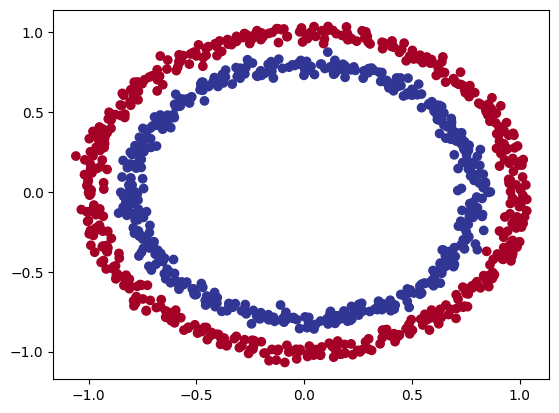

In [6]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


## Input and output shapes


In [7]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
len(X), len(y)

(1000, 1000)

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modeling

In [10]:
# 1. Create the model

tf.random.set_seed=42

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="softmax")
])

# 2. Compile the mdoel

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X,
                        y,
                        epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4898 - loss: 0.6906 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5103 - loss: 0.6889  
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4974 - loss: 0.6836 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 0.6787
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5093 - loss: 0.6783 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5030 - loss: 0.6733 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4945 - loss: 0.6693 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4759 - loss: 0.6626 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5125 - loss: 0.6610 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 0.6553 


In [11]:
# Let's train for longer
# 1. Create the model

model_1.fit(X, y, epochs=200, verbose=0)

In [12]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 0.0252  


[0.02437221258878708, 0.5]

Our model seems to perform as if it's guessing with only % 50 accuracy

In [13]:
# 1. Create the model

tf.random.set_seed=42

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mdoel

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_2.fit(X, y, epochs=50, verbose=0)

In [14]:
# 1. Create the model

tf.random.set_seed=42

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    #tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the mdoel

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_3.fit(X, y, epochs=50, verbose=0)

In [15]:
# 1. Create the model

tf.random.set_seed=42

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    #tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mdoel

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_4.fit(X, y, epochs=50, verbose=0)

In [16]:
# 1. Create the model

tf.random.set_seed=42

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    #tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the mdoel

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_5.fit(X, y, epochs=50, verbose=0)

In [17]:
# Create a function to visualize our models prediction
# Create meshgrid of the X and y values
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  Based on the following sites:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and creat a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multicalss classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the descision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



In [18]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4788 - loss: 0.6926  


[0.6932474374771118, 0.46799999475479126]

In [19]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1595024599098636,
 1.1360036756154805)

127/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


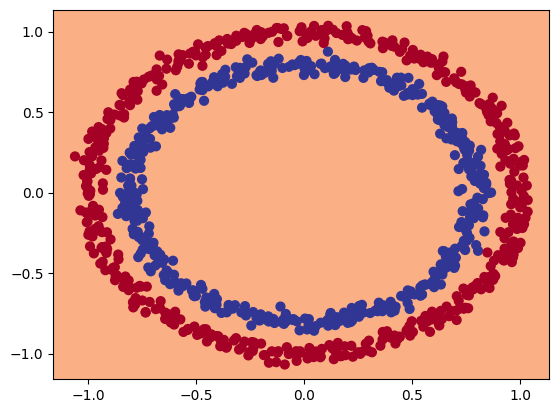

In [20]:
plot_decision_boundary(model=model_1, X=X, y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


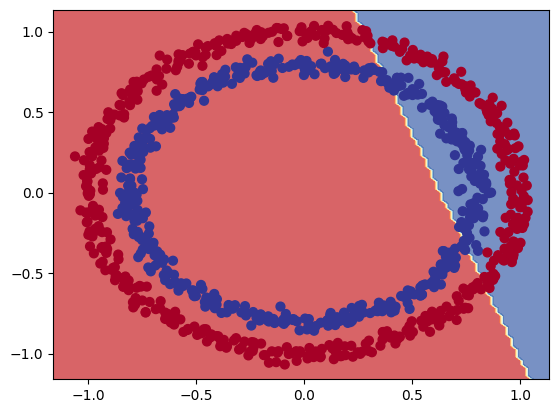

In [21]:
plot_decision_boundary(model=model_2, X=X, y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


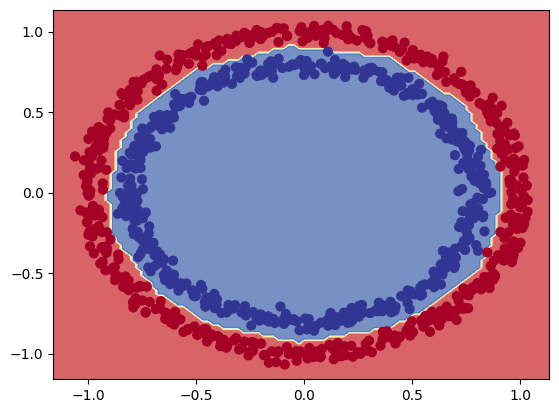

In [22]:
plot_decision_boundary(model=model_3, X=X, y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


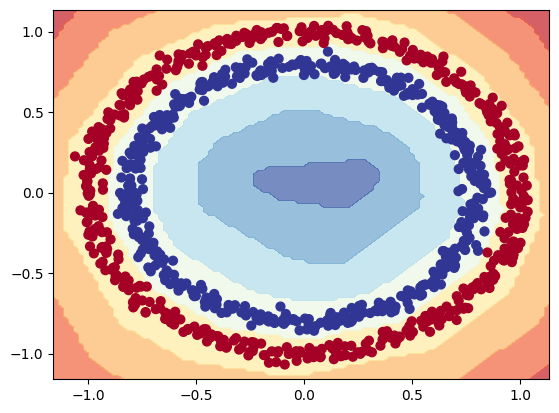

In [23]:
plot_decision_boundary(model=model_4, X=X, y=y)

### Non-linearity

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


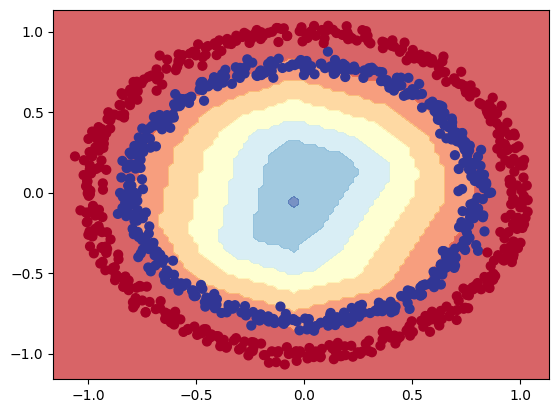

In [24]:
plot_decision_boundary(model=model_5, X=X, y=y)

In [25]:
# Create a toy tensor (similar to data we pass into our models)


A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

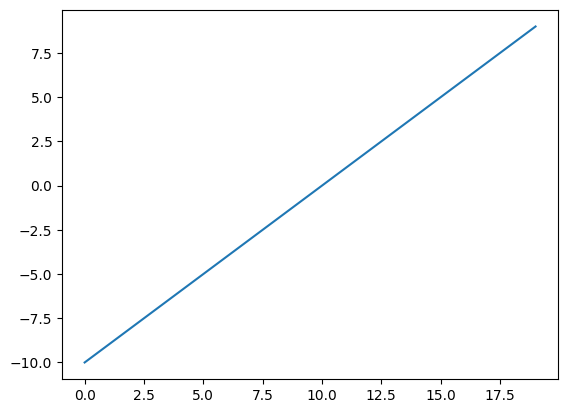

In [26]:
plt.plot(A)

In [27]:
# Let's start by replicating sigmoid > sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [28]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

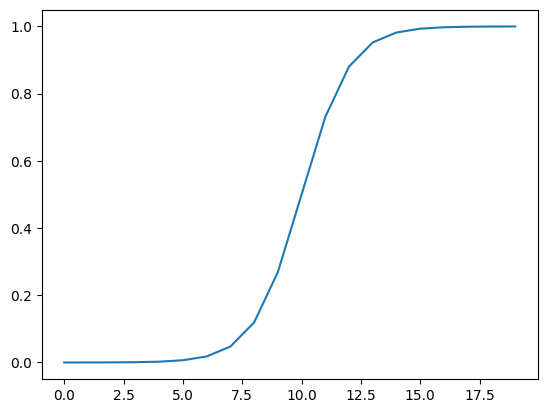

In [29]:
plt.plot(sigmoid(A))

In [30]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu funciton
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

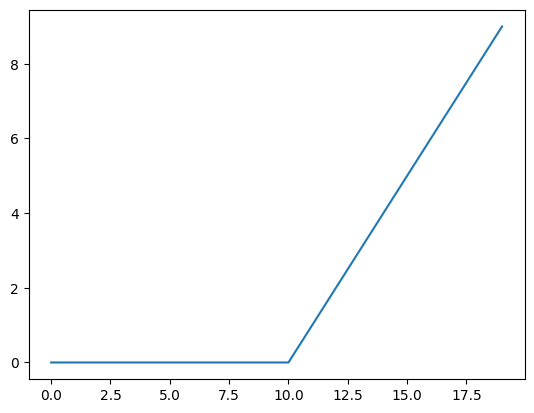

In [31]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [32]:
tf.keras.activations.relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

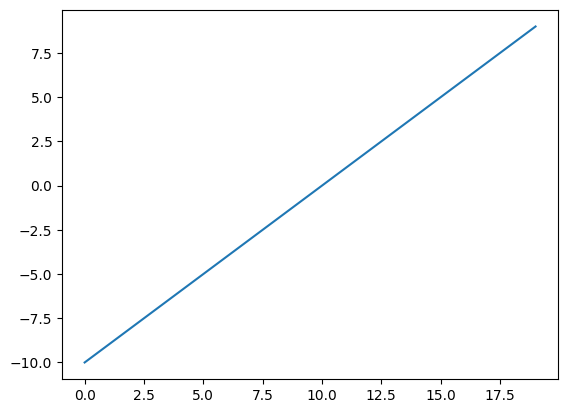

In [33]:
# Let's try a linear activation function
plt.plot(tf.keras.activations.linear(A))

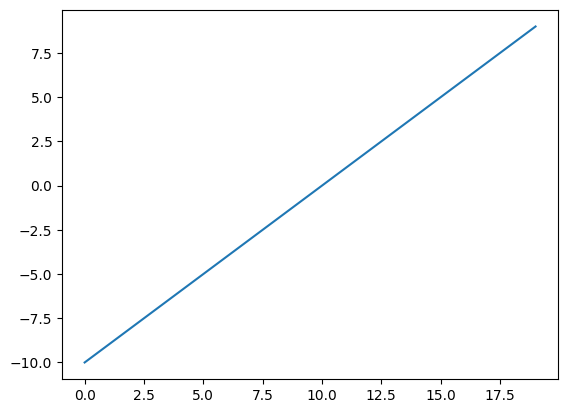

In [34]:
plt.plot(A)

In [35]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## **Machine learning activation function cheat sheet**

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and improving our classification

So far we've been testing and training on the same dataset...
This is not a good practice in ML
Let's create a training and test dataset

In [36]:
# Split our data into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [38]:
# Lets recreate a model to fit on the training data and evaluate on the testing data

# Set random seed

tf.random.set_seed=42

# 1. Create a model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=["accuracy"])

# 3. Fit the model

history_6 = model_6.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5086 - loss: 0.6874
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6496 - loss: 0.6707 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7144 - loss: 0.6418 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - loss: 0.6120 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.5120 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.4379 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9557 - loss: 0.3153 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9949 - loss: 0.2116 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.1308 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.1092 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0680
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [39]:
model_6.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.0192  


[0.01759110763669014, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


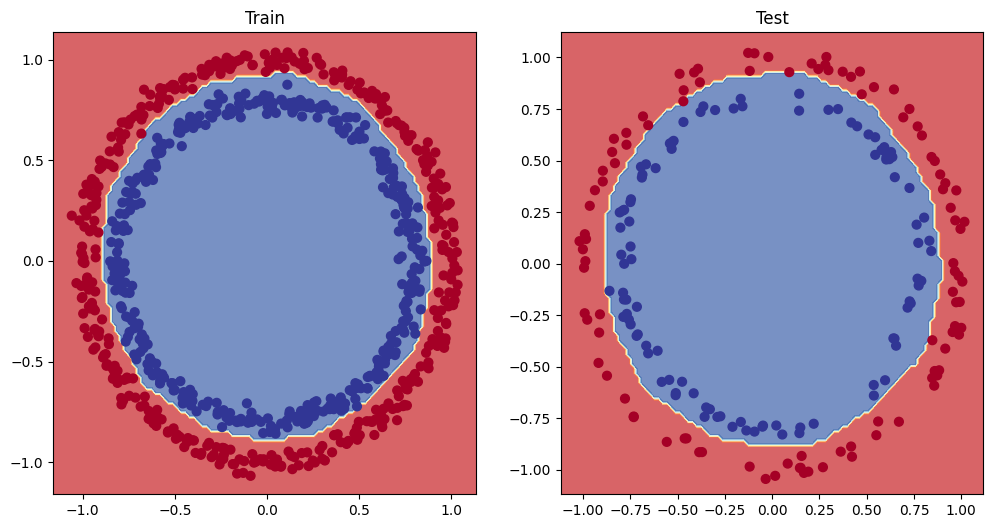

In [40]:
# Plot the decision boundaries for the training and test data sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_6, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_6, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [42]:
history_6.history

{'accuracy': [0.5174999833106995,
  0.6162499785423279,
  0.6899999976158142,
  0.7925000190734863,
  0.8812500238418579,
  0.8899999856948853,
  0.9649999737739563,
  0.9925000071525574,
  0.9937499761581421,
  0.9950000047683716,
  1.0,
  0.9987499713897705,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9950000047683716,
  1.0,
  1.0],
 'loss': [0.6847906708717346,
  0.6666496396064758,
  0.640127956867218,
  0.5892918705940247,
  0.49167630076408386,
  0.4099283218383789,
  0.29155367612838745,
  0.19550342857837677,
  0.1308487206697464,
  0.0996117815375328,
  0.06579471379518509,
  0.056263070553541183,
  0.039376016706228256,
  0.03282658010721207,
  0.027935264632105827,
  0.023694293573498726,
  0.020308656617999077,
  0.0182097889482975,
  0.01804259978234768,
  0.014831061474978924,
  0.012553070671856403,
  0.012457489967346191,
  0.017821773886680603,
  0.010602759197354317,
  0.008915645070374012]}

In [43]:
# Convert the history object into a dataframe
pd.DataFrame(history_6.history)

,accuracy,loss
0,0.51750,0.684791
1,0.61625,0.666650
2,0.69000,0.640128
3,0.79250,0.589292
4,0.88125,0.491676
5,0.89000,0.409928
6,0.96500,0.291554
7,0.99250,0.195503
8,0.99375,0.130849
9,0.99500,0.099612


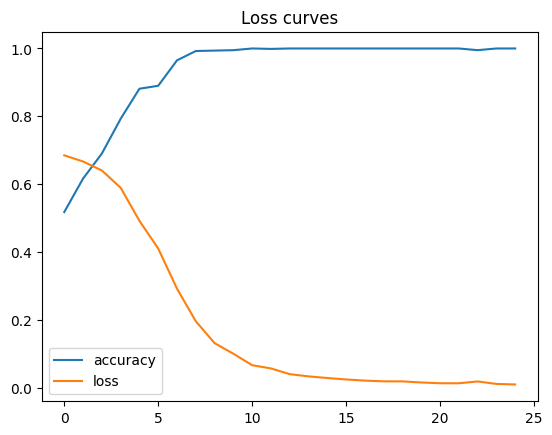

In [44]:
# Plot the loss curves
pd.DataFrame(history_6.history).plot()
plt.title("Loss curves")
plt.show()

**Note:** For many problems, the loass fuction doing down means the model is improving (the predcition it's making ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - your can think of a callback as an extra peice of functionality, you can add to your *while* it's training.
* ANother model (we could use the same ones as above, but we're practicing building models here).
* A modified loss curves plot.

In [70]:
# Set random seed
tf.random.set_seed=42

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (paasing lr_scheduler callback)
history_7 = model_7.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler],verbose=0)

<Axes: xlabel='epochs'>

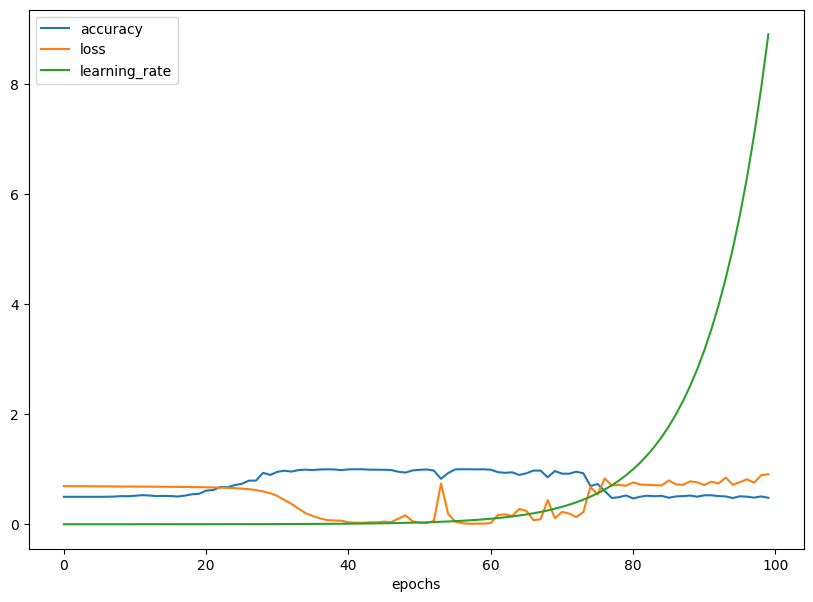

In [71]:
pd.DataFrame(history_7.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

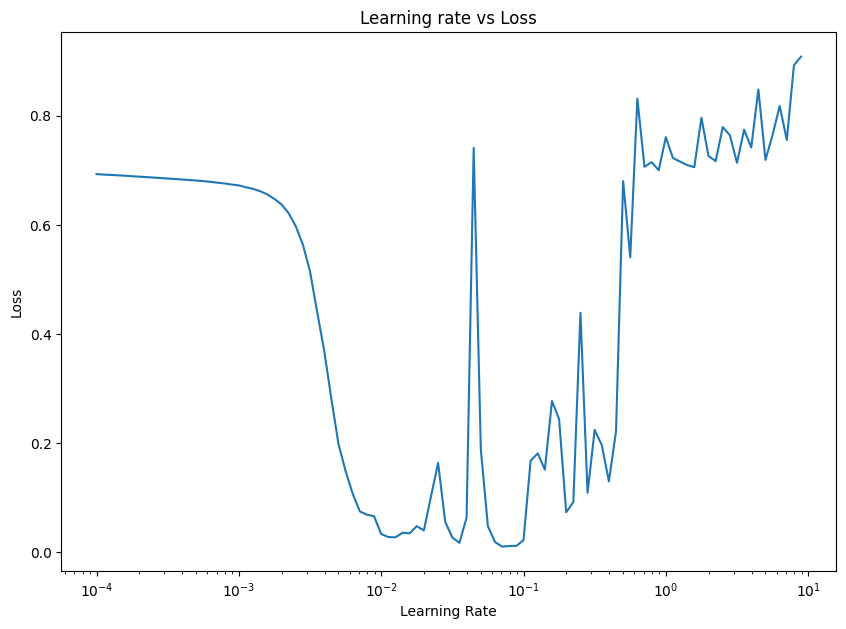

In [72]:
# Plot the learning rate verses the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## From our graph above it looks like a learning rate of 0.022 would be a better learning rate, let's try it our next model.

In [68]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [86]:
# Set random seed
tf.random.set_seed=42

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(.022),
                metrics=["accuracy"])

# Create a learning rate callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (paasing lr_scheduler callback)
history_8 = model_8.fit(X_train, y_train, epochs=100,verbose=0)

In [87]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018  


[0.0021068037021905184, 1.0]

<Axes: xlabel='epochs'>

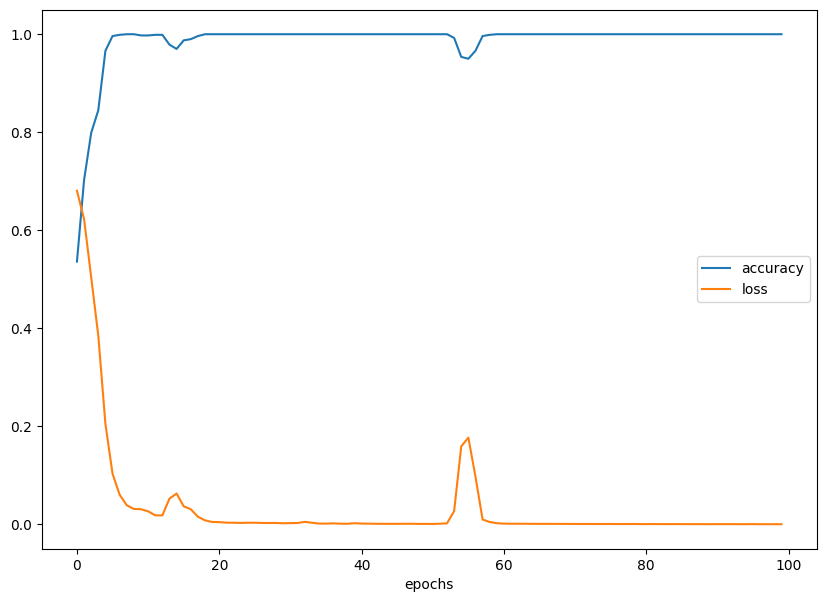

In [88]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

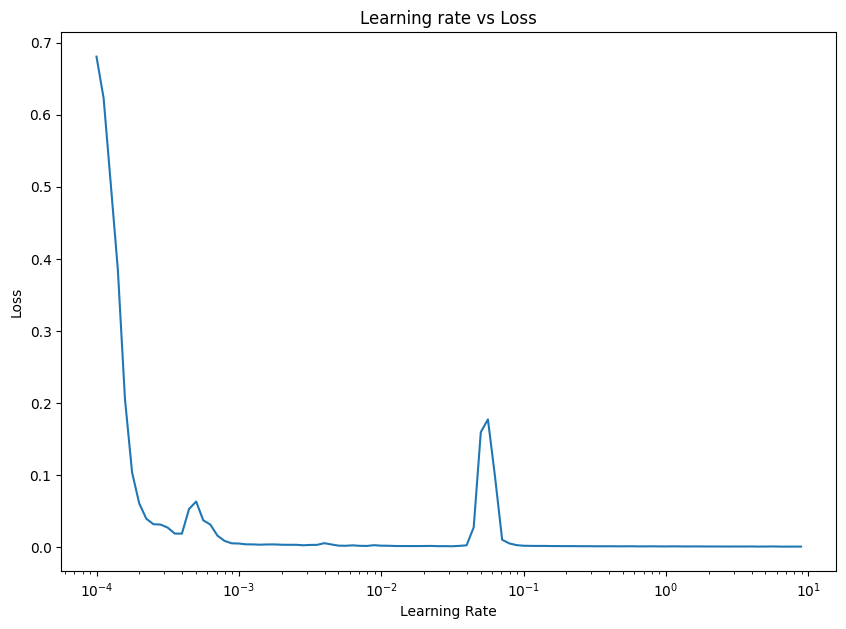

In [89]:
# Plot the learning rate verses the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


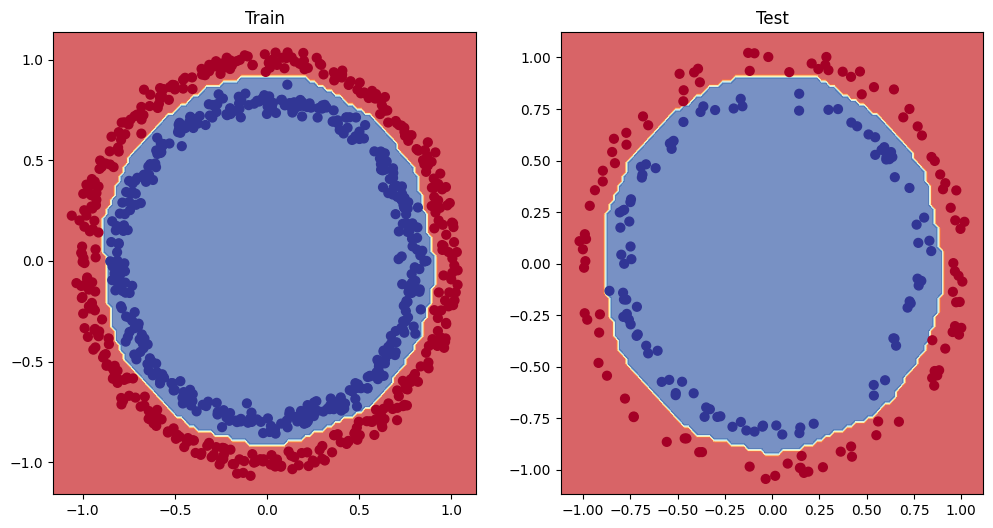

In [91]:
# Plot the decision boundaries for the training and test data sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show();